# Importing essential Python libraries


In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')

# Loading data

In [2]:
sdata_andes = pd.read_csv('andes.csv')# load the spectra
sdata_coast = pd.read_csv('coastI.csv')
rawspectra = sdata_andes.append(sdata_coast) # crate a unique dataset (DataFrame)
rawspectra.index = range(70) # indexing the rows from 0 to 69

## Defining functions

In [3]:
def spectral_separability(ref1, ref2):
    "Calculate spectral separability of two curves in %"
    return 100 - (ref1 / ref2 * 100)

## 1. Soil carbon data

In [4]:
carbon_data = pd.read_csv('C_and_description.csv') # load the dataset
print('     \n    Average of soil TC (%)\n')
print(carbon_data.groupby(['location', 'depth']).std().C) 

     
    Average of soil TC (%)

location  depth  
Andes     (0-5)      2.424681
          (20-40)    1.287470
          (5-20)     1.652499
Coast     (0-5)      1.551116
          (20-40)    1.256719
          (5-20)     1.782998
Name: C, dtype: float64


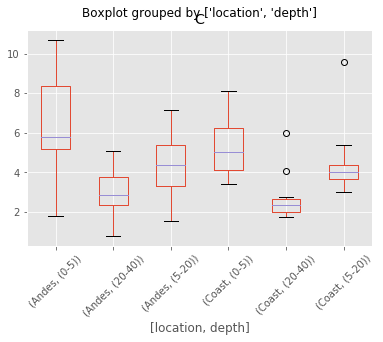

In [5]:
ax = carbon_data.boxplot(column='C', by=['location', 'depth'], rot=45)

## 2. Andisol Raw_Reflectance
- Plotting some spectral curves
- The samples from 0 to 36 correspond to Andisol.

Replace **[2, 7, 14, 18, 25, 34]** by **range(36)** to visualize all curves of the Andisol.

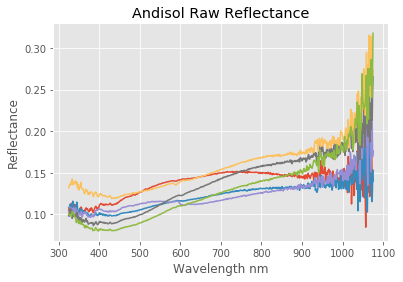

In [6]:
### plotting ###
fig, ax = plt.subplots()

for i in [2, 7, 14, 18, 25, 34]:
    ax.plot(rawspectra.loc[i])
    
ax.set_xlabel('Wavelength nm')
ax.set_ylabel('Reflectance');
ax.set_title('Andisol Raw Reflectance');

### 2.1 Plotting the mean of the reflectance by depth

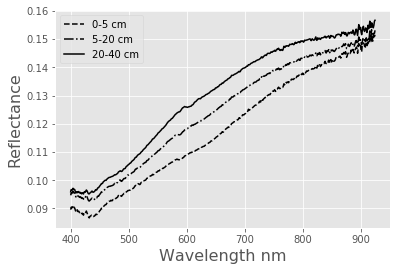

In [7]:
andes_depth_1 = sdata_andes.loc[range(0, 36, 3)]#
andes_depth_2 = sdata_andes.loc[range(1, 36, 3)]# to create a new variable with the samples split by depths   
andes_depth_3 = sdata_andes.loc[range(2, 36, 3)]#

#### plotting #####
### .ix[:, 75:600] is for selecting the range 400-924 nm.
fig, ax = plt.subplots()
ax.plot(andes_depth_1.ix[:, 75:600].mean(axis=0), '--k', label='0-5 cm');
ax.plot(andes_depth_2.ix[:, 75:600].mean(axis=0), '-.k', label='5-20 cm');
ax.plot(andes_depth_3.ix[:, 75:600].mean(axis=0), '-k', label='20-40 cm');

ax.set_xlabel('Wavelength nm', fontsize=16)
ax. set_ylabel('Reflectance', fontsize=16)
ax.legend();

   ### 3.2 Plotting the spectral separability of two depths

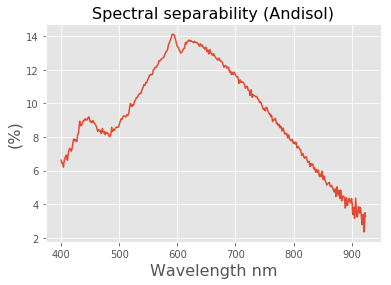

In [8]:
# spectral separabilty of the reflectance of two depths
andes_mean_ref_depth_1 = andes_depth_1.ix[:, 75:600].mean(axis=0) # To calculate the mean of the reflectance for 0-5 cm
andes_mean_ref_depth_3 = andes_depth_3.ix[:, 75:600].mean(axis=0) # To calculate the mean of the reflectance for 20-40 cm

### plotting ###
fig, ax = plt.subplots()
ax.plot(spectral_separability(andes_mean_ref_depth_1, andes_mean_ref_depth_3));
ax.set_xlabel('Wavelength nm', fontsize=16)
ax.set_ylabel('(%)', fontsize=16);
ax.set_title('Spectral separability (Andisol)', fontsize=16);
#ax.axhline(diff_ref.mean());

## 3. Ultisol Raw_Reflectance
- Plotting some spectral curves
- The samples from 0 to 36 correspond to Andisol.

Replace **[2, 7, 14, 18, 25, 34]** by **range(36)** to visualize all curves of the Andisol.

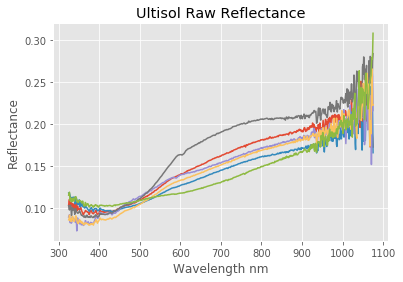

In [9]:
### plotting ###
fig, ax = plt.subplots()

for i in [37, 41, 46, 50, 55, 68]:
    ax.plot(rawspectra.loc[i])
    
ax.set_xlabel('Wavelength nm')
ax.set_ylabel('Reflectance');
ax.set_title('Ultisol Raw Reflectance');

### 3.1 Plotting the mean of the reflectance by depth

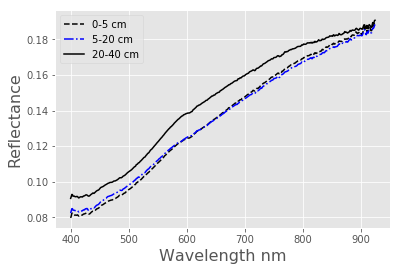

In [10]:
coast_depth_1 = rawspectra.loc[range(36, 70, 3)] # to create a new variable with the samples split by 0-5 cm depth
coast_depth_2 = rawspectra.loc[range(37, 70, 3)] # to create a new variable with the samples split by 5-20 cm depth
coast_depth_3 = rawspectra.loc[range(38, 70, 3)] # to create a new variable with the samples split by 20-40 cm depth

### plotting ###
### .ix[:, 75:600] is for selecting the range 400-924 nm. To plot the reflectance with noisy part, this need to be remove
fig, ax = plt.subplots()
ax.plot(coast_depth_1.ix[:, 75:600].mean(axis=0), '--k', label='0-5 cm');
ax.plot(coast_depth_2.ix[:, 75:600].mean(axis=0), '-.b', label='5-20 cm');
ax.plot(coast_depth_3.ix[:, 75:600].mean(axis=0), '-k', label='20-40 cm');

ax.set_xlabel('Wavelength nm', fontsize=16)
ax.set_ylabel('Reflectance', fontsize=16)
ax.legend();
#fig.savefig('raw_reflectance_coast.svg')

   ### 3.2 Plotting the spectral separability of two depths

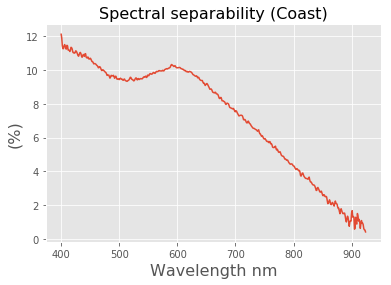

In [11]:
coast_mean_ref_depth_1 = coast_depth_1.ix[:, 75:600].mean(axis=0)
coast_mean_ref_depth_3 = coast_depth_3.ix[:, 75:600].mean(axis=0)

### plotting ###
fig, ax = plt.subplots()
ax.plot(spectral_separability(coast_mean_ref_depth_1 , coast_mean_ref_depth_3));
ax.set_xlabel('Wavelength nm', fontsize=16)
ax.set_ylabel('(%)', fontsize=16);
ax.set_title('Spectral separability (Coast)', fontsize=16);
#ax.axhline(diff_ref.mean());

### 3.3 Comparing soil TC of the two depths for both site of study

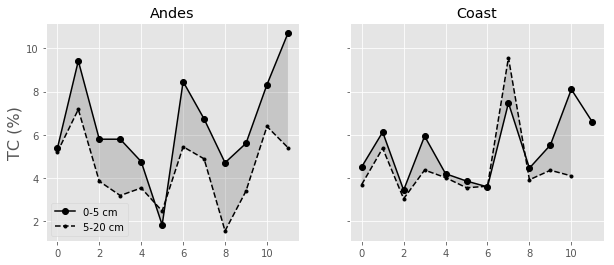

In [12]:
_andes_depth1 = carbon_data[(carbon_data['location']=='Andes' ) &(carbon_data['depth'] == '(0-5)')]
_andes_depth2 = carbon_data[(carbon_data['location']=='Andes' ) &(carbon_data['depth'] == '(5-20)')]


_coast_depth1 = carbon_data[(carbon_data['location']=='Coast' ) &(carbon_data['depth'] == '(0-5)')]
_coast_depth2 = carbon_data[(carbon_data['location']=='Coast' ) &(carbon_data['depth'] == '(5-20)')]


#### plotting #####
fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

ax0.plot(range(12), _andes_depth1.C, 'o-k', label='0-5 cm')
ax0.plot(range(12),_andes_depth2.C,'--.k',  label='5-20 cm')
ax0.fill_between(range(12), _andes_depth1.C, _andes_depth2.C, facecolor='gray', alpha=0.3);
ax0.set_title('Andes')
ax0.set_ylabel('TC (%)', fontsize=16)
ax0.legend();

ax1.plot(range(12), _coast_depth1.C, 'o-k', label='0-5')
ax1.plot(range(11),_coast_depth2.C,'--.k',  label='5-20')
ax1.fill_between(range(11), _coast_depth1.C[:11], _coast_depth2.C, facecolor='gray', alpha=0.3);
ax1.set_title('Coast');
#fig.savefig('carbon_diff.svg')

## 4 Correlation coefficient between spectral bands and TC

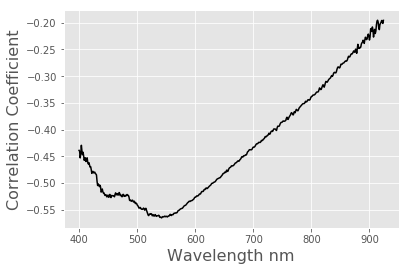

In [13]:
from scipy.stats import pearsonr

correlation_coef = []

for i in range(75, 600):
    correlation_coef.append(pearsonr(rawspectra.ix[:, i], carbon_data.C)[0])

### plotting ###
fig, ax = plt.subplots()
ax.plot(range(400, 925),correlation_coef, '-k');
#ax.set_xticks(x[::250]);
ax.set_ylabel('Correlation Coefficient', fontsize=16);
ax.set_xlabel("Wavelength nm", fontsize=16);
#plt.savefig('correlation.svg')

### Test the depths index
- For Andes test the following ranges: (0, 36, 3), (1, 36, 3) and (2, 36, 3)
- For Coast test the following ranges: (36, 70, 3), (37, 70, 3) and (38, 70, 3)

You need to change the ranges in the next cell to verify the samples used in calculations.

In [14]:
carbon_data['depth'].loc[range(38, 70, 3)]

38    (20-40)
41    (20-40)
44    (20-40)
47    (20-40)
50    (20-40)
53    (20-40)
56    (20-40)
59    (20-40)
62    (20-40)
65    (20-40)
68    (20-40)
Name: depth, dtype: object